In [1]:
# 6.1.4
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# City codification
from citipy import citipy
# Import the datetime module from the datetime library.
from datetime import datetime
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key
from config import g_key
# G map
import gmaps

In [2]:
# Create a new set of 2,000 random latitudes and longitudes.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

621

In [5]:
# API URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
url

'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6619410f447cf07be3b81d2be533963b'

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Part 1 END
# Loop through all the cities in our list.
for i in range(len(cities)):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
    # Loop through all the cities in the list.
for i, city in enumerate(cities):
#END part 2

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# END part 3
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | mataura
Processing Record 2 of Set 13 | huangnihe
Processing Record 3 of Set 13 | albany
Processing Record 4 of Set 13 | puerto ayora
Processing Record 5 of Set 13 | nanchang
Processing Record 6 of Set 13 | antofagasta
Processing Record 7 of Set 13 | busselton
Processing Record 8 of Set 13 | castro
Processing Record 9 of Set 13 | kapaa
Processing Record 10 of Set 13 | rikitea
Processing Record 11 of Set 13 | bambous virieux
Processing Record 12 of Set 13 | saint-michel-des-saints
Processing Record 13 of Set 13 | upernavik
Processing Record 14 of Set 13 | bonthe
Processing Record 15 of Set 13 | bredasdorp
Processing Record 16 of Set 13 | attawapiskat
City not found. Skipping...
Processing Record 17 of Set 13 | risch
Processing Record 18 of Set 13 | asau
Processing Record 19 of Set 13 | jumla
Processing Record 20 of Set 13 | etchoropo
Processing Record 21 of Set 13 | coquimbo
Processing Record 22 

Processing Record 32 of Set 16 | ewa beach
Processing Record 33 of Set 16 | viransehir
Processing Record 34 of Set 16 | chuy
Processing Record 35 of Set 16 | tommot
Processing Record 36 of Set 16 | kirovskiy
Processing Record 37 of Set 16 | bhimunipatnam
Processing Record 38 of Set 16 | bathsheba
Processing Record 39 of Set 16 | mahebourg
Processing Record 40 of Set 16 | nikolskoye
Processing Record 41 of Set 16 | alofi
Processing Record 42 of Set 16 | nhulunbuy
Processing Record 43 of Set 16 | clyde river
Processing Record 44 of Set 16 | qaanaaq
Processing Record 45 of Set 16 | kyshtovka
Processing Record 46 of Set 16 | ancud
Processing Record 47 of Set 16 | olden
Processing Record 48 of Set 16 | barentsburg
City not found. Skipping...
Processing Record 49 of Set 16 | virginia beach
Processing Record 50 of Set 16 | mistelbach
Processing Record 1 of Set 17 | solnechnyy
Processing Record 2 of Set 17 | bargal
City not found. Skipping...
Processing Record 3 of Set 17 | bethel
Processing R

Processing Record 22 of Set 20 | rio gallegos
Processing Record 23 of Set 20 | visby
Processing Record 24 of Set 20 | dunedin
Processing Record 25 of Set 20 | dombarovskiy
Processing Record 26 of Set 20 | port moresby
Processing Record 27 of Set 20 | abay
Processing Record 28 of Set 20 | ankpa
Processing Record 29 of Set 20 | tezu
Processing Record 30 of Set 20 | rungata
City not found. Skipping...
Processing Record 31 of Set 20 | colonia
Processing Record 32 of Set 20 | goiatuba
Processing Record 33 of Set 20 | broome
Processing Record 34 of Set 20 | husavik
Processing Record 35 of Set 20 | mar del plata
Processing Record 36 of Set 20 | necochea
Processing Record 37 of Set 20 | khuzhir
Processing Record 38 of Set 20 | aketi
Processing Record 39 of Set 20 | marienberg
Processing Record 40 of Set 20 | papara
Processing Record 41 of Set 20 | manuk mangkaw
Processing Record 42 of Set 20 | souillac
Processing Record 43 of Set 20 | klyuchi
Processing Record 44 of Set 20 | cape canaveral
Pro

Processing Record 9 of Set 24 | bubaque
Processing Record 10 of Set 24 | port lincoln
Processing Record 11 of Set 24 | hobyo
Processing Record 12 of Set 24 | atkinson
Processing Record 13 of Set 24 | linjiang
Processing Record 14 of Set 24 | grasse
Processing Record 15 of Set 24 | santa rosa
Processing Record 16 of Set 24 | weston
Processing Record 17 of Set 24 | lakhipur
Processing Record 18 of Set 24 | nara
Processing Record 19 of Set 24 | aripuana
Processing Record 20 of Set 24 | wloclawek
Processing Record 21 of Set 24 | antsirabe
Processing Record 22 of Set 24 | sal rei
Processing Record 23 of Set 24 | iranshahr
Processing Record 24 of Set 24 | naryan-mar
Processing Record 25 of Set 24 | san jeronimo
Processing Record 26 of Set 24 | matadi
Processing Record 27 of Set 24 | ashcroft
Processing Record 28 of Set 24 | uroteppa
City not found. Skipping...
Processing Record 29 of Set 24 | tumannyy
City not found. Skipping...
Processing Record 30 of Set 24 | jalu
Processing Record 31 of S

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.1927,168.8643,49.24,73,20,3.65,NZ,2021-02-04 19:40:46
1,Huangnihe,43.5583,128.0239,0.52,91,24,1.01,CN,2021-02-04 19:41:09
2,Albany,42.6001,-73.9662,39.00,45,5,5.01,US,2021-02-04 19:40:45
3,Puerto Ayora,-0.7393,-90.3518,86.00,62,0,5.75,EC,2021-02-04 19:40:17
4,Nanchang,28.6833,115.8833,52.05,89,78,6.96,CN,2021-02-04 19:41:10
5,Antofagasta,-23.6500,-70.4000,73.00,64,20,13.80,CL,2021-02-04 19:40:58
6,Busselton,-33.6500,115.3333,55.00,79,40,12.28,AU,2021-02-04 19:40:48
7,Castro,-24.7911,-50.0119,74.93,88,100,8.21,BR,2021-02-04 19:40:49
8,Kapaa,22.0752,-159.3190,64.00,77,40,4.61,US,2021-02-04 19:40:47
9,Rikitea,-23.1203,-134.9692,78.46,68,82,10.09,PF,2021-02-04 19:40:44


In [8]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [9]:
#### 6.3.1

In [10]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

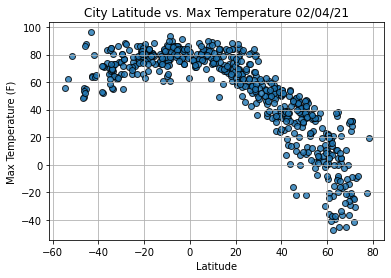

In [11]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

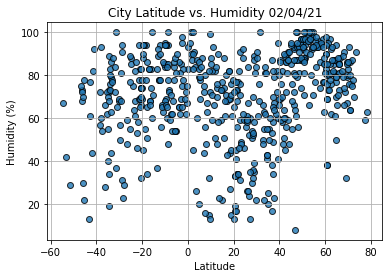

In [12]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

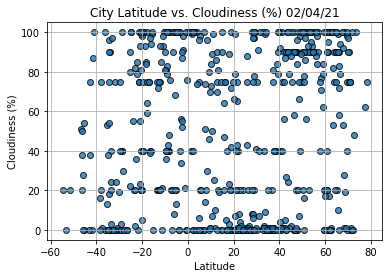

In [13]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

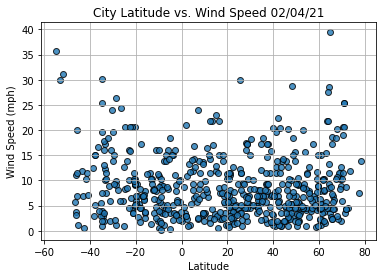

In [14]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [15]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [16]:
# Create an equal number of latitudes and temperatures.
lats = [42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
temps = [80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0]

In [17]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, temps)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y = -0.45x + 92.94
The p-value is: 0.011


In [18]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(lat * slope + intercept) for lat in lats]

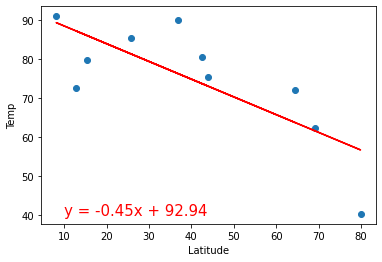

In [19]:
# Import Matplotlib.
import matplotlib.pyplot as plt
# Create a scatter plot of the x and y values.
plt.scatter(lats,temps)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

In [20]:
#city_data_df.loc[(city_data_df["Lat"] >= 0)]
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Huangnihe,43.5583,128.0239,0.52,91,24,1.01,CN,2021-02-04 19:41:09
2,Albany,42.6001,-73.9662,39.00,45,5,5.01,US,2021-02-04 19:40:45
4,Nanchang,28.6833,115.8833,52.05,89,78,6.96,CN,2021-02-04 19:41:10
8,Kapaa,22.0752,-159.3190,64.00,77,40,4.61,US,2021-02-04 19:40:47
11,Saint-Michel-Des-Saints,46.6834,-73.9159,30.99,8,0,1.01,CA,2021-02-04 19:41:12


In [21]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [22]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

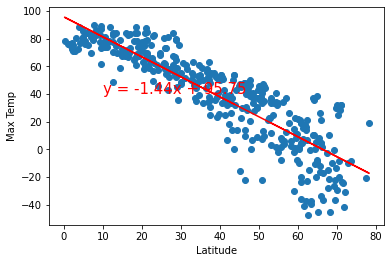

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))


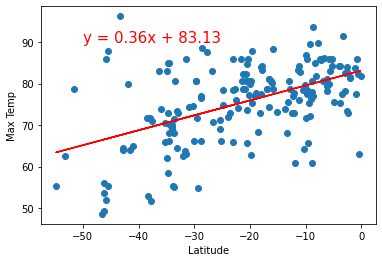

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))


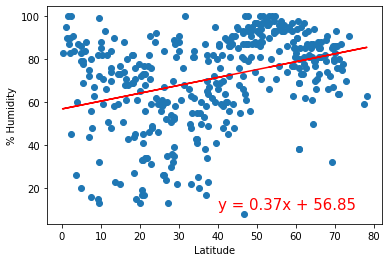

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

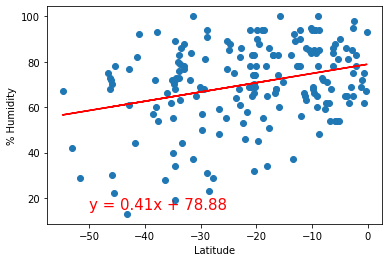

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

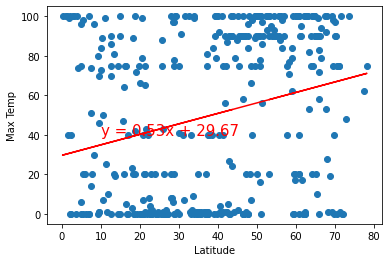

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Cloudiness', 'Max Temp',(10,40))

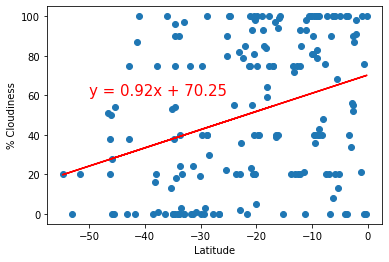

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))


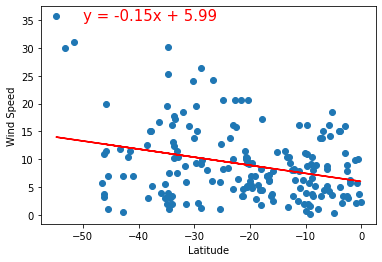

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))